<a href="https://colab.research.google.com/github/Dasirak8/freightmastersvuejs/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2019 Subway Rider Survey** by New York City Council

This data contains survey responses on several questions about people's experiences with our mass transit system. The data was collected by Speaker Corey Johnson, who at the time was also the acting Public Advocate, through in-person canvassing at subway stations in all five boroughs and through an online link.

The survey was not conducted on a representative sample. Any missing data is due to the respondent choosing to skip a question.

​​https://data.cityofnewyork.us/City-Government/2019-Subway-Rider-Survey/4y8i-pbvd/about_data

## Description:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/Project_Mika_Pyhton/2019_Subway_Rider_Survey_20251115.csv")

### Columns and descriptions:

*subway_line_used_most_often* - Survey Question: Which subway line do you use most often?

*use_of_subway_frequency* - Survey Question: How frequently do you use the subway?

*get_to_subway_via* - Survey Question: How do you get to the subway?

*primary_use_of_subway* - Survey Question: What is the primary reason you use the subway?

*average_length_subway_ride* - Survey Question: What is the average length of your subway ride?

*overall_satisfaction* - Survey Question: How satisfied are you with the subway service?

*frequency_of_delays* - Survey Question: How frequently do you experience subway delays?

*approximate_delay_duration* - Survey Question: If you experience delays, approximately how long are you delayed?

*alternative_transport* - Survey Question: If you experience a delay greater than 15 minutes, while waiting for a train are you likely to…?

*frequency_of_rerouting* - Survey Question: How frequently do you experience service changes/re-routing?

*top_three_complaints* - Survey Question: What are your concerns or complaints about transit service?

*most_common_reason_for_delay* - Survey Question: If you are delayed on a train, what is the most common reason given by a conductor?

*is_subway_affordable* - Survey Question: At its current rate do you feel the subway is affordable

*opinion_on_increased_fares* - Survey Question: What do you think about the fare increases being proposed by the MTA?

*submitted_at* - Time and date of submission

*survey_stop_borough* - If the survey was collected in person, the borough in which the survey was conducted

*survey_stop_location* - If the survey was collected in person, the name of the subway station at which the survey was filled in.

*zip_code* - The zip code of the respondent

*collection_method* - How the survey response was collected

### Understanding the Dataframe:

The next step is used to understand the amount of columns, their type, and the amount of entries to get a clear picture of the dataset for data cleaning.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10704 entries, 0 to 10703
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   subway_line_used_most_often   10704 non-null  object
 1   use_of_subway_frequency       10199 non-null  object
 2   get_to_subway_via             10015 non-null  object
 3   primary_use_of_subway         10128 non-null  object
 4   average_length_subway_ride    10090 non-null  object
 5   overall_satisfaction          10079 non-null  object
 6   frequency_of_delays           10019 non-null  object
 7   approximate_delay_duration    9931 non-null   object
 8   alternative_transport         9930 non-null   object
 9   frequency_of_rerouting        9922 non-null   object
 10  top_three_complaints          10083 non-null  object
 11  most_common_reason_for_delay  10093 non-null  object
 12  is_subway_affordable          10704 non-null  bool  
 13  opinion_on_incre



---


### Understanding Data Types:

Here, we focus just on the data types for a quick reference, so other data doesn't get in the way.

From this line of code, we understood that since the vast majority of the data are strings, we'll have to come up with solutions to turn this data into integers or floats for the analysis.

In [ ]:
df.dtypes

,0
subway_line_used_most_often,object
use_of_subway_frequency,object
get_to_subway_via,object
primary_use_of_subway,object
average_length_subway_ride,object
overall_satisfaction,object
frequency_of_delays,object
approximate_delay_duration,object
alternative_transport,object
frequency_of_rerouting,object




---


### Understanding the results in columns:

To proceed with data cleening, we have to go column by column to see the respondents' answers. Since it was a survey, they answered from a definitive list of options.

Let's start with looking at the unique values of subway lines used most often:

In [ ]:
for val in df["subway_line_used_most_often"].unique():
    print(val)

1
E
F
7
R
Q
N
A
D
3
L
M
5
2
C
6
J
4
G
S
Staten Island Railway
W
B
Z




---


This gives us the unique values for the frequency of the subway usage:

In [ ]:
for val in df["use_of_subway_frequency"].unique():
    print(val)

Once a week
Weekdays, Mon - Fri
Once a month
Everyday / Almost everyday
~5 days per week
More than once a week, varies
nan
Almost never
Never




---


Here are all the ways the survey respondents get to the subway:

In [ ]:
for val in df["get_to_subway_via"].unique():
    print(val)

Bus
Walk
Citibike
nan
Path / NJ Transit
Personal bike
Taxi
Drive personal vehicle
Ferry
LIRR
For-hire vehicle
Metro North




---


Now, let's look at the primary reasons why people use the subway:

In [ ]:
for val in df["primary_use_of_subway"].unique():
    print(val)

Work
Other
School
nan




---


Understanding how long are respondents' subway rides on average:

In [ ]:
for val in df["average_length_subway_ride"].unique():
    print(val)

20 - 40 min
40 - 60 min
< 20 min
60 - 90 min
90 min - 2 hours
nan


We can consider switching this variable to qualitative data.



---


Now, let's look if the survey respondents are satisfied with the subway

service:

In [ ]:
for val in df["overall_satisfaction"].unique():
    print(val)

Neutral
Not satisfied
Very satisfied
Somewhat satisfied
Highly unsatisfied
nan





This question used the Likert scale (a way to present opinion data ordinally, from very unsatisfied to very satisfied) for the options, so we could turn it into ordinal data: a numeric scale from 1 to 5.


---



Finding out the unique values for the frequency of delays:

In [ ]:
for val in df["frequency_of_delays"].unique():
    print(val)

A few times a week
Everyday
Never
Rarely
nan
Almost never




---

Finding the approximate delay durations respondents experience while using the subway:

In [ ]:
for val in df["approximate_delay_duration"].unique():
    print(val)

10 - 20 min
20 - 45 min
5 - 10 min
45 - 60 min
nan
> 60 min




---

Options for the alternative transport instead of the subway?:

In [ ]:
for val in df["alternative_transport"].unique():
    print(val)

Wait for next train
Use another train
Walk
For-hire vehicle
Take a bus
nan
Bike




---

The options for the frequency of rerouting:

In [ ]:
for val in df["frequency_of_rerouting"].unique():
    print(val)

nan
All the time
Only at night
Almost never
Only on weekends




---


Finding the top three complaints survey respondents have with the subway:

In [ ]:
for val in df["top_three_complaints"].unique():
    print(val)

['Delays', 'Crime / Safety', 'Station infrastructure']
['Delays', 'Frequent route changes', 'High fares']
['Delays']
nan
['Delays', 'Old trains', 'Overcrowded trains']
['Delays', 'High fares', 'Lack of handicap access']
['Delays', 'High fares', 'Station infrastructure']
['Delays', 'Frequent route changes', 'Overcrowded trains']
['Delays', 'Frequent route changes', 'Customer service']
['Delays', 'Old trains', 'Lack of handicap access']
['Overcrowded trains']
['High fares', 'Crime / Safety', 'Station infrastructure']
['High fares', 'Overcrowded trains', 'Lack of handicap access']
['Delays', 'Station infrastructure', 'Overcrowded trains']
['Delays', 'Overcrowded trains']
['High fares', 'Crime / Safety']
['Delays', 'Crime / Safety', 'Overcrowded trains']
['High fares', 'Customer service', 'Lack of handicap access']
['Delays', 'High fares', 'Old trains']
['Delays', 'Frequent route changes', 'Old trains']
['Crime / Safety', 'Station infrastructure', 'Lack of handicap access']
['Delays', 'Fre



---
The most common reasons for delays listed by the respondents:

In [ ]:
for val in df["most_common_reason_for_delay"].unique():
    print(val)

Waiting for signal change
Train traffic
Signal malfunction
Police incident
Weather
nan
No reason is given
Sick passenger




---
Respondents opinions on increased fares:

In [ ]:
for val in df["opinion_on_increased_fares"].unique():
    print(val)

Neutral
Unaware
Other / No thoughts
Positive
Negative
nan




---

A list of the subway stations where respondents took the survey:

In [ ]:
for val in df["survey_stop_location"].unique():
    print(val)

Queens Plaza
30th Ave
Junction Boulevard
Flushing / Main Street
Court Square
Other
Junius St.
Jackson Heights / Roosevelt Ave
Broadway Junction
36th Street
Myrtle / Wyckoff Avenue
Jay Street / Metro Tech
Prospect Avenue
Fort Hamilton Parkway
Bay Ridge / 77th Street
nan
St. George Ferry Terminal
West 4th Street / Washington Square
96th Street
135th Street
34th Street / Hudson Yards
14th Street / 8th Ave
Christopher Street / Sheridan Square
Atlantic Terminal
Yankee Stadium / 161th Street
Hunts Point Avenue
238th Street
149th Grand Concourse




---


A list of zipcodes where respondents took the survey:

In [ ]:
for val in df["zip_code"].unique():
    print(val)

11367
nan
11432
11436
11102
11375
11208
10703
10001
11377
11369
11101
11233
12771
11372
10475
11368
11365
11355
11373
11694
11354
11413
11412
11370
11106
10466
11378
11435
11434
10040
10462
21202
11550
11429
7018
10029
11212
7305
11207
11232
11226
11238
11213
11209
11236
11217
10455
11216
11224
11422
11691
11215
11220
11221
11228
11219
11210
11204
10305
11385
11421
11423
10019
11218
10456
11510
10039
10302
11223
11234
10002
7105
10306
11235
10304
10037
10301
10314
10307
10310
10452
7201
44028
10014
10030
10451
10303
11135
10468
10027
10467
10024
10025
10032
10472
10465
10454
11692
10018
11201
10459
10128
10474
11237
7013
7093
10010
10011
10012
11211
10003
11561
11427
7719
10065
10022
7607
11203
10033
10005
7087
10473
10471
10463
10034
10507
7310
10026
10458
11713
11638
10550
10031
12590
10023
11001
10051
10469
10470
12721
10453
11214
10013
10016
10021
11206
10009
11231
11249
11104
10036
11105
11225
11230
10075
11374
11415
11358
11103
11205
07041
11418
11419
11222
10035
11417
10017
1122



---

Here we wanted to see how many null values each column has. This will give us an insight into further data analysis, because the higher the number of nulls, the less answers there is.

In [ ]:
df.isnull().sum()

,0
subway_line_used_most_often,0
use_of_subway_frequency,505
get_to_subway_via,689
primary_use_of_subway,576
average_length_subway_ride,614
overall_satisfaction,625
frequency_of_delays,685
approximate_delay_duration,773
alternative_transport,774
frequency_of_rerouting,782


We can see, that the least amount of data is in Borough, Location, and zipcode of where the survey was taken.


---



## Data Cleaning:

Cleaning unnessecary spaces, enters, capitalizations, and other standartization:

In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype(str).str.strip().str.replace(r"\s+", " ", regex=True)

This will standardize the data and make it look similar. Otherwise, Python will not see the data if there are spare spaces, uppercase or lowercase letters, etc. The data has to be as homogenous as possible for better results.



---



Converting ordinal variables into numeric scores:

In [ ]:
satisfaction_map = {
    "Very satisfied": 5,
    "Somewhat satisfied": 4,
    "Neutral": 3,
    "Not satisfied": 2,
    "Highly unsatisfied": 1
}
df["overall_satisfaction_num"] = df["overall_satisfaction"].map(satisfaction_map)

As a result, we added a column that has the satisfaction transformed into numerical ratings from 1 to 5.



---



In [ ]:
df["use_of_subway_frequency"] = (
    df["use_of_subway_frequency"]
        .astype("string")
        .str.strip()
        .str.replace(r"\s+", " ", regex=True)
        .replace({
            "Everyday / Almost everyday": "Every day",
            "~5 days per week": "5 days per week",
            "More than once a week, varies": "More than once a week",
            "Weekdays, Mon - Fri": "Weekdays",
            "Once a month": "Once a month",
            "Once a week": "Once a week",
            "Almost never": "Almost never",
            "nan": None
        })
        .fillna("Unknown")
)

freq_map = {
    "Almost never": 0,
    "Once a month": 1,
    "Once a week": 2,
    "Weekdays": 4,
    "5 days per week": 5,
    "More than once a week": 3,
    "Every day": 6,
    "Unknown": -1
}

df["use_of_subway_frequency_num"] = df["use_of_subway_frequency"].map(freq_map)

We created a frequency map to answer the question how often do respondents use the subway, where 0 is "Almost never", and 6 is "Every Day".

Unknown is assigned -1 because it replaces the null values, and it's easy to filter out all the unknown values so they aren't included in the analysis.


---



In [ ]:
df["approximate_delay_duration"] = df["approximate_delay_duration"].fillna("Unknown")

delay_map = {
    "5 - 10 min": 1,
    "10 - 20 min": 2,
    "20 - 45 min": 3,
    "45 - 60 min": 4,
    "> 60 min": 5,
    "Unknown": -1
}
df["approx_delay_num"] = df["approximate_delay_duration"].map(delay_map)

This allows for the delays to also be shown as simple ordinal data, where -1 replaces the Null Values for an easier analysis.


---



Breaking down the top-3 complaints:

In [ ]:
df["top_three_complaints_list"] = df["top_three_complaints"].str.split(", ")
complaints_exploded = df.explode("top_three_complaints_list")

Since here we cannot form any meaningful numerical transformation, we break the top-3 complaints into a list with 3 entries. This allows counting the complaints, finding the territorial correlations, and other forms of data analysis.



---



Turning date into correct format:

In [ ]:
import pandas as pd

df["submitted_at"] = pd.to_datetime(
    df["submitted_at"].str.replace(" @ ", " "),
    format="%m/%d/%Y %I:%M %p",
    errors="coerce"
)

df["hour"] = df["submitted_at"].dt.hour
df["weekday"] = df["submitted_at"].dt.day_name()
df["date"] = df["submitted_at"].dt.date

In case we'd neet to see if there are any data trends, we transformed the dates into a correct date format. However, after we did that, we came to a conclusion that the survey only ran for less than 10 days.


---



Here we're adding another column with randomized lengths of a subway ride given the ranges in the answers. Since the survey only suggested the ranges, it limited us in the ways we can analyze the data.

This step allows us to use such instruments as scatterplots and allows for a more visually appealing charts.

In [ ]:
def random_ride(v):
    if pd.isna(v):
        return np.nan

    s = str(v).strip().lower()

    if s == "20 - 40 min":
        return np.random.uniform(20, 40)
    if s == "40 - 60 min":
        return np.random.uniform(40, 60)
    if s == "< 20 min":
        return np.random.uniform(5, 20)
    if s == "60 - 90 min":
        return np.random.uniform(60, 90)
    if s == "90 min - 2 hours":
        return np.random.uniform(90, 120)

    return np.nan

df["avg_ride"] = df["average_length_subway_ride"].apply(random_ride)

Now, we're doing the same with the approximate delay.

In [ ]:
def random_delay(s):
    if pd.isna(s):
        return np.nan
    s = str(s).strip()
    if s == "10 - 20 min":
        return np.random.uniform(10, 20)
    if s == "20 - 45 min":
        return np.random.uniform(20, 45)
    if s == "45 - 60 min":
        return np.random.uniform(45, 60)
    if s == "5 - 10 min":
        return np.random.uniform(5, 10)
    if s == "> 60 min":
        return np.random.uniform(60, 90)
    return np.nan

df["avg_delay"] = df["approximate_delay_duration"].apply(random_delay)



---


Here is a snippet of the full dataset with these updated randomized columns:

In [ ]:
df[["avg_ride", "avg_delay", "overall_satisfaction_num"]]

,avg_ride,avg_delay,overall_satisfaction_num
0,27.080465,18.114849,3.0
1,59.658735,11.810683,2.0
2,46.614113,21.878094,5.0
3,5.656325,14.211261,5.0
4,30.584081,16.652609,4.0
...,...,...,...
10699,28.931853,NaN,4.0
10700,29.983459,20.904883,2.0
10701,32.507842,18.081954,4.0
10702,58.914737,18.279658,4.0


## Exploratory Data Analysis:

The first point of interest in our data analysis is understanding the best performing New York Subway lines based on average satisfaction:

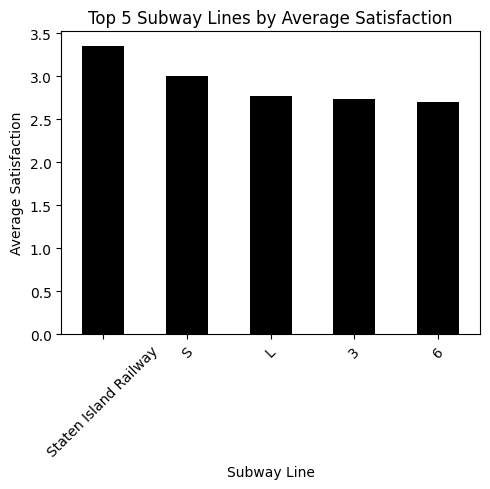

In [ ]:
top_lines = (
    df.groupby("subway_line_used_most_often")["overall_satisfaction_num"]
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

# Plot
plt.figure(figsize=(5, 5))
top_lines.plot(kind='bar', color='black')
plt.ylabel('Average Satisfaction')
plt.xlabel('Subway Line')
plt.title('Top 5 Subway Lines by Average Satisfaction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As we can see, the Staten Island Railway takes the crown as a line providing the most satisfactory service, with the S being second, and L third. Staten Island Railway is quite short and less crowded, and S is a Shuttle that runs between Times Square and Grand Central.

The overall trend we see is that shorter lines tend to provide a better service, since they are easier in maintenance.


---



Now that we know what lines provide the highest satisfaction, let's look at the average satisfaction by borough:

In [ ]:
satisfaction_by_borough = df[
    (df['survey_stop_borough'] != 'nan') &
    (df['overall_satisfaction_num'].notna())
]

average_satisfaction_per_borough = satisfaction_by_borough.groupby('survey_stop_borough')['overall_satisfaction_num'].mean().sort_values(ascending=False)

respondents_per_borough = satisfaction_by_borough['survey_stop_borough'].value_counts()

print("Average Overall Satisfaction per Borough:")
print(average_satisfaction_per_borough)
print("\nNumber of Respondents per Borough:")
print(respondents_per_borough)

Average Overall Satisfaction per Borough:
survey_stop_borough
Bronx            3.176471
Staten Island    3.082192
Brooklyn         3.065134
Manhattan        3.044554
Queens           2.954802
Name: overall_satisfaction_num, dtype: float64

Number of Respondents per Borough:
survey_stop_borough
Brooklyn         261
Manhattan        202
Queens           177
Bronx            102
Staten Island     73
Name: count, dtype: int64


/tmp/ipython-input-2089552413.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_satisfaction_per_borough.index, y=average_satisfaction_per_borough.values, palette='viridis')


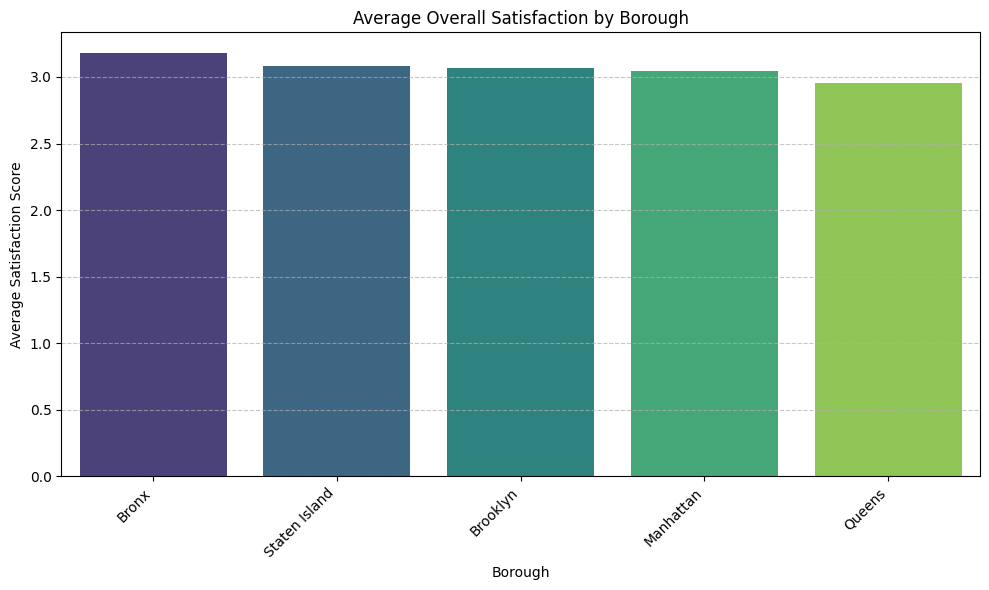

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=average_satisfaction_per_borough.index, y=average_satisfaction_per_borough.values, palette='viridis')
plt.title('Average Overall Satisfaction by Borough')
plt.xlabel('Borough')
plt.ylabel('Average Satisfaction Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The average satisfaction seem to slightly exceed 3.0 for all boroughs except Queens. Bronx appears to be the most satisfied borough with an average rating of 3.17. However, Bronx is also the borough with the least amount of respondents (102), with only Staten Island having less (73).



---



Now, we want to see the top 5 lines with the longest rides. In this case, the ride length includes only the time spent inside of a train.

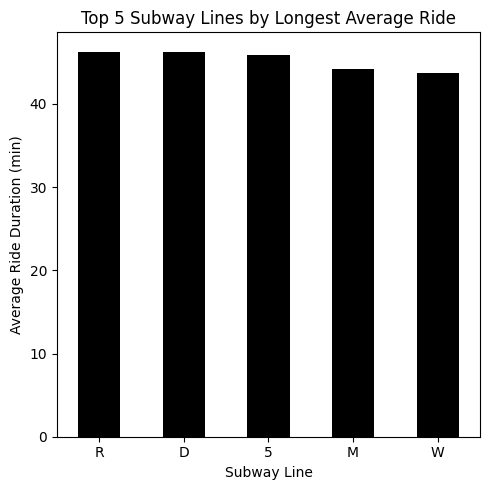

In [ ]:
longest_rides = (
    df.groupby('subway_line_used_most_often')['avg_ride']
      .mean()
      .sort_values(ascending=False)
      .head(5)
)

# Plot bar chart
plt.figure(figsize=(5, 5))
longest_rides.plot(kind='bar', color='black')
plt.ylabel('Average Ride Duration (min)')
plt.xlabel('Subway Line')
plt.title('Top 5 Subway Lines by Longest Average Ride')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

We can see that the lines average length is rooted heavily in how many boroughs they cover and how they run: D runs through Bronx, Manhattan, and Brooklyn, with often runnin local in both Brooklyn and Bronx.

R train runs from deep Brooklyn, and it is an entirely local train, which often runs on slower speeds.


---



Let's analyze the complaints among the worst lines based on satisfaction to find out what problems are the most annoying for the passengers:

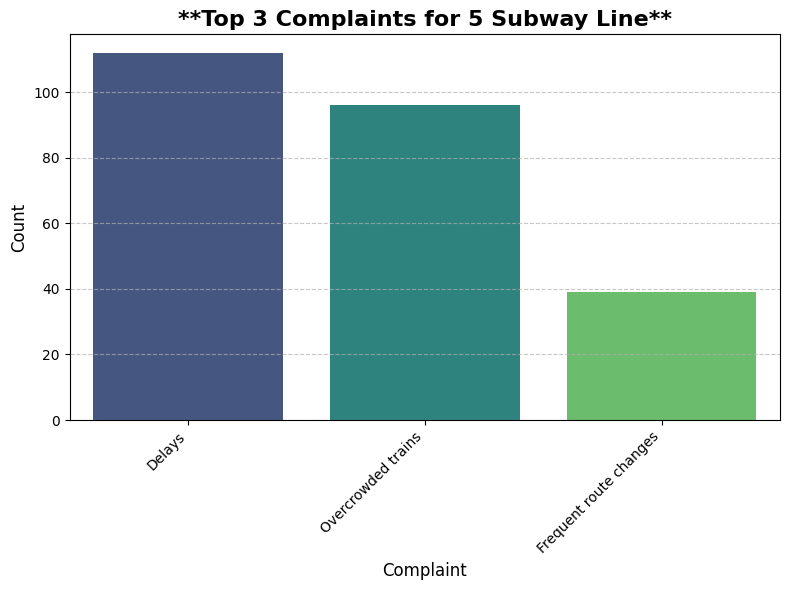

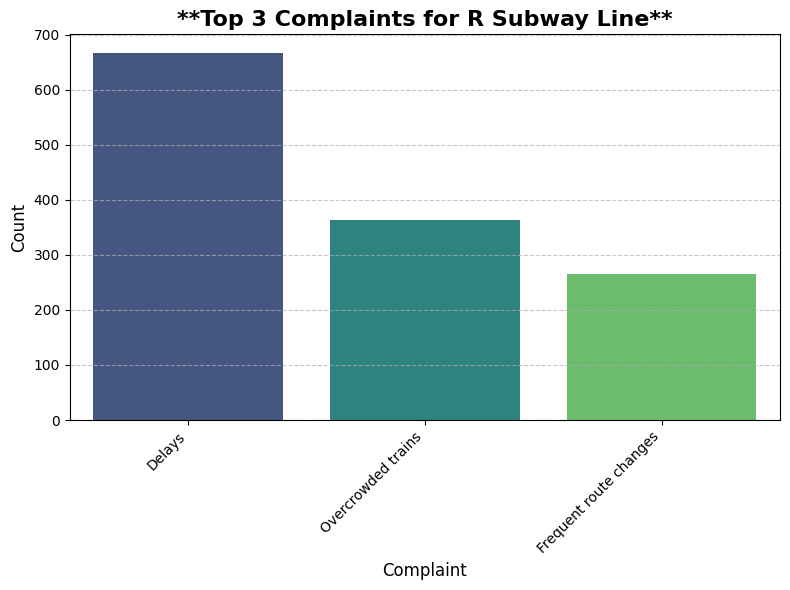

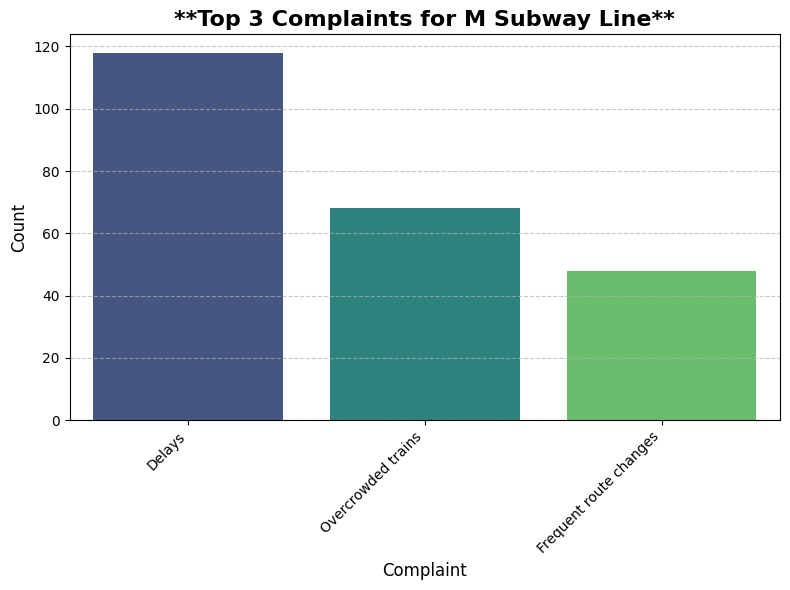

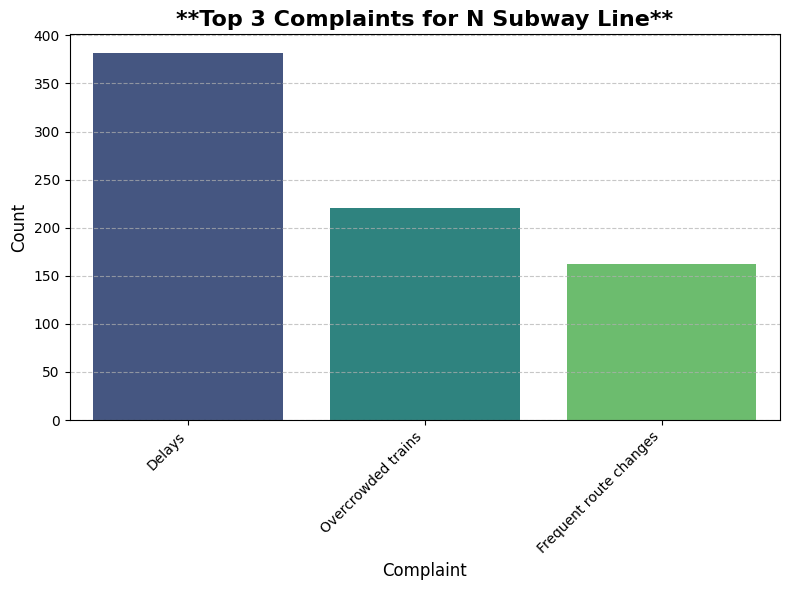

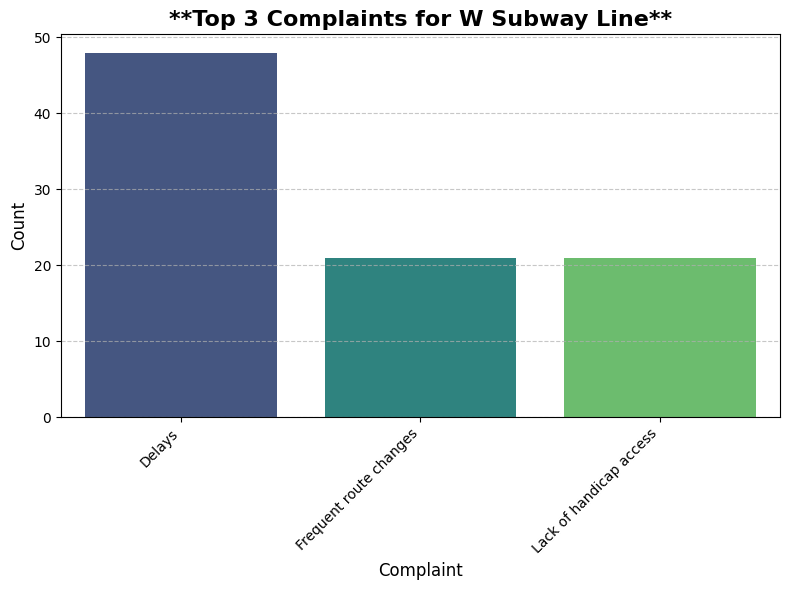

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

least_satisfactory_lines = (
    df.groupby("subway_line_used_most_often")["overall_satisfaction_num"]
    .mean()
    .sort_values(ascending=True)
)

top_complaints_by_line = (
    complaints_exploded[complaints_exploded['subway_line_used_most_often'].isin(least_satisfactory_lines.head(5).index)]
    .groupby('subway_line_used_most_often')['top_three_complaints_list']
    .value_counts()
    .groupby(level=0)
    .head(3)
)

least_satisfactory_line_names = least_satisfactory_lines.head(5).index.tolist()

for line in least_satisfactory_line_names:
    complaints_data = top_complaints_by_line[line].reset_index()
    complaints_data.columns = ['Complaint', 'Count']

    complaints_data['Complaint'] = complaints_data['Complaint'].str.replace("['", "", regex=False).str.replace("']", "", regex=False).str.strip().str.replace("'", "", regex=False)

    plt.figure(figsize=(8, 6))
    sns.barplot(x='Complaint', y='Count', data=complaints_data, palette='viridis', hue='Complaint', legend=False)
    plt.title(f'**Top 3 Complaints for {line} Subway Line**', fontsize=16, fontweight='bold')
    plt.xlabel('Complaint', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

We can see that the five least satisfactory lines are 5, R, M, N, and W. With 5, R, and M also being the lines with a longer average ride, we see a clear correlation between the two.

The most frequent complaint among all these lines is delays, with overcrowded trains being a second major issue across 5, R, M, and N. The secon major issue for the W is frequent route changes.

Frequent route changes is also a thrid main complaint for the riders of 5,R, M, and N. The riders of W highlight the lack of handicap access as a third major issue.



---



Since delays are such a big deal for the NY subway passengers, what are the most common reasons for them in different boroughs?

/tmp/ipython-input-3125505965.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='most_common_reason_for_delay', y='count', data=top_reasons, palette='viridis')


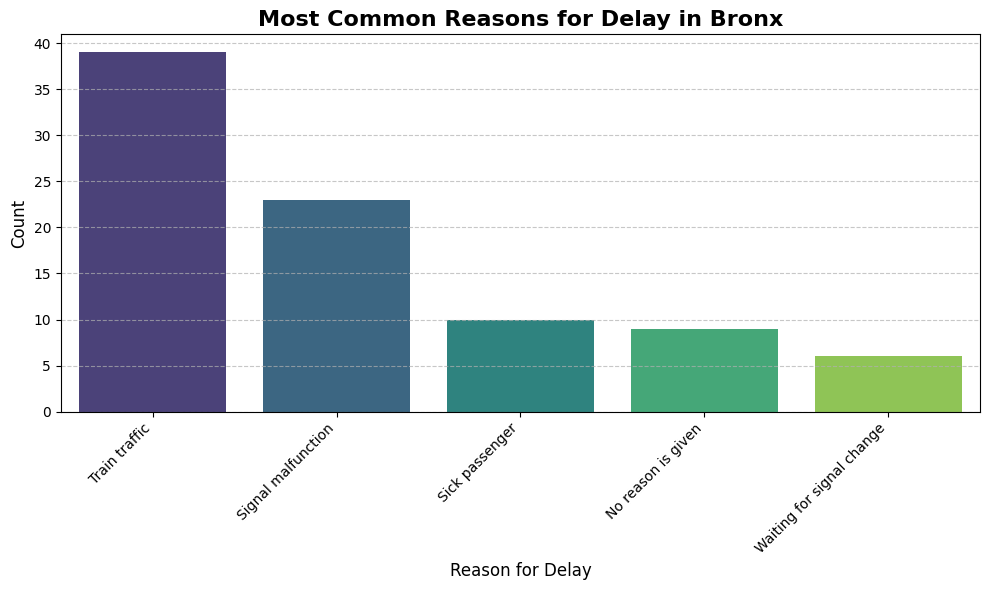

/tmp/ipython-input-3125505965.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='most_common_reason_for_delay', y='count', data=top_reasons, palette='viridis')


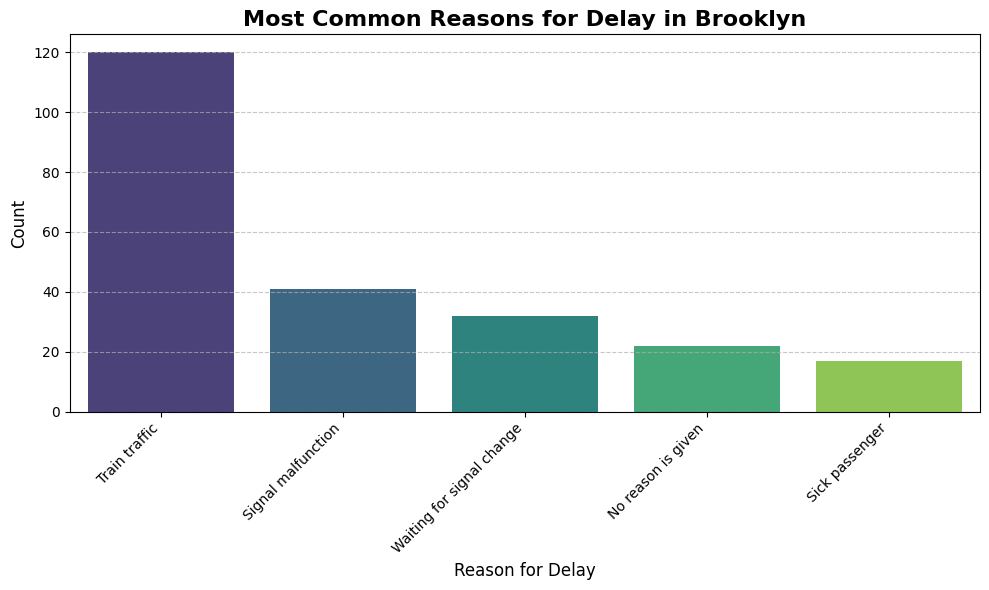

/tmp/ipython-input-3125505965.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='most_common_reason_for_delay', y='count', data=top_reasons, palette='viridis')


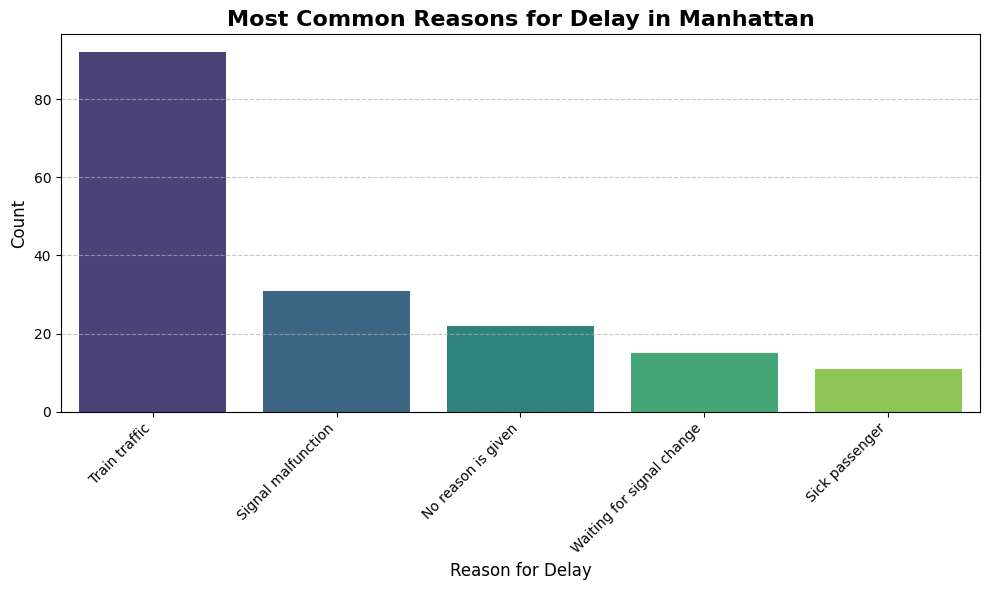

/tmp/ipython-input-3125505965.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='most_common_reason_for_delay', y='count', data=top_reasons, palette='viridis')


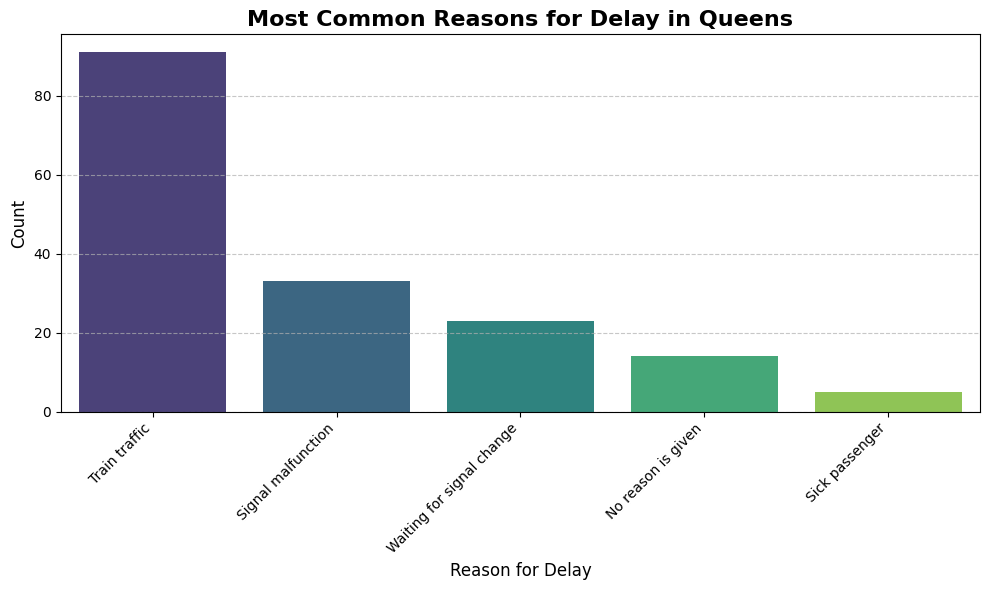

/tmp/ipython-input-3125505965.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='most_common_reason_for_delay', y='count', data=top_reasons, palette='viridis')


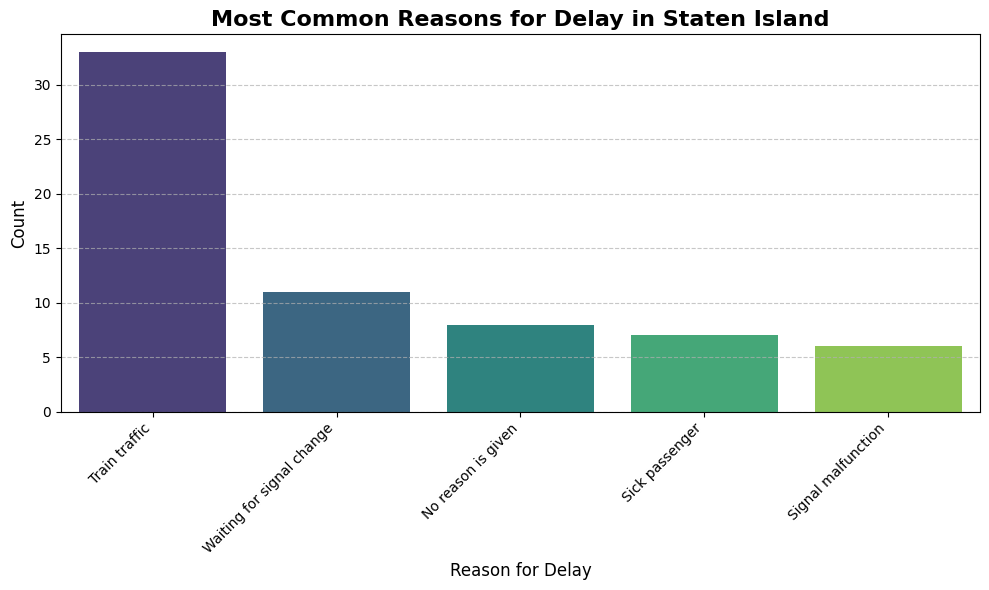

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


delay_reasons_by_borough = df[
    (df['survey_stop_borough'] != 'nan') &
    (df['most_common_reason_for_delay'] != 'nan')
]

borough_delay_counts = delay_reasons_by_borough.groupby(['survey_stop_borough', 'most_common_reason_for_delay']).size().reset_index(name='count')
boroughs = borough_delay_counts['survey_stop_borough'].unique()

for borough in boroughs:
    borough_data = borough_delay_counts[borough_delay_counts['survey_stop_borough'] == borough]
    top_reasons = borough_data.sort_values(by='count', ascending=False).head(5)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='most_common_reason_for_delay', y='count', data=top_reasons, palette='viridis')
    plt.title(f'Most Common Reasons for Delay in {borough}', fontsize=16, fontweight='bold')
    plt.xlabel('Reason for Delay', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


We can see that train traffic is the biggest problem for the Subway in general. Signal malfunction seems to also be a huge problem that breaks up the communication necessary for running trains.

The problem of sick passengers seem to be more common in Bronx and Staten Island.

The fascinating stat is that delay for no reason is among the most common reasons across the whole city.

---



Since delays are identified as one of the biggest problems of the New York Subway, we want to find if they are affecting passenger satisfaction.

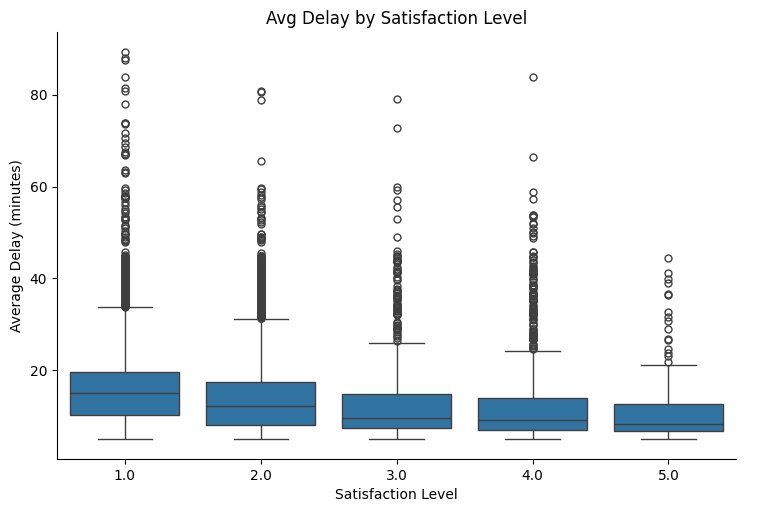

In [ ]:
sns.catplot(
    data=df,
    x="overall_satisfaction_num",
    y="avg_delay",
    kind="box",
    height=5,
    aspect=1.5
)

plt.xlabel("Satisfaction Level")
plt.ylabel("Average Delay (minutes)")
plt.title("Avg Delay by Satisfaction Level")
plt.show()


Given this graph, we can see a direct correlation between the two. People, who gave the lowest rating of satisfaction to the subway service experienced the highest delays, which could have been north of 80 minutes.

However, passengers who are completely satisfied with the subway not only experienced shorter delays but also a lower range of delays.


---



So, since we went through boroughs and lines, let's take a look on the stations. Next we'll find out which stations are more subject to service changes/rerouting.

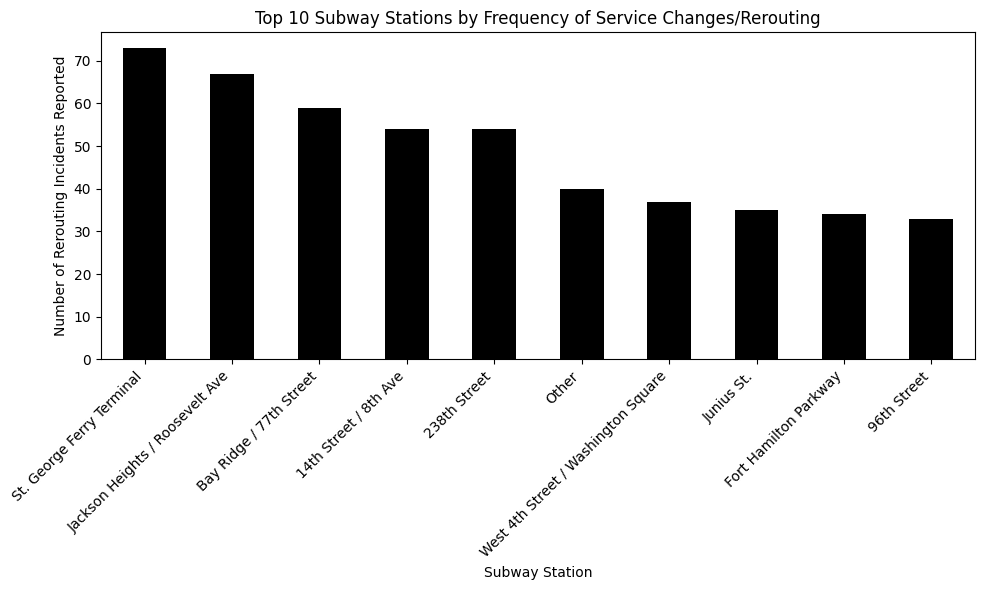

In [ ]:
rerouting_stations = df[
    (df['frequency_of_rerouting'] != 'nan') &
    (df['survey_stop_location'] != 'nan')
]

# Count the number of rerouting instances per station
rerouting_counts = rerouting_stations['survey_stop_location'].value_counts().head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
rerouting_counts.plot(kind='bar', color='black')
plt.title('Top 10 Subway Stations by Frequency of Service Changes/Rerouting')
plt.xlabel('Subway Station')
plt.ylabel('Number of Rerouting Incidents Reported')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Most often, passengers experience service changes and reroutes on St. Georger Ferry Terminal station in Staten Island, which is Staten Island Railroad station.

Next, it's followed by Jackson Heights/Roosevelt Ave. This is a big station in Queens, that serves as a stop for 6 different lines: E, F, M, R, and 7.

Bay Ridge/77th Street is a line for the R train in deep Brooklyn.

14th street/8 street station in Manhattan serves A, C, E, and L lines, and also acts as a last stop for the L line.

238th Street is far up in Bronx, close to the end of the 1 line.

To conclude, every borough has at least one problematic stop when it comes to service changes.



---



Now, NYC Subway recently increased the ride fair. How was this decision recepted based on overall satisfaction scores?

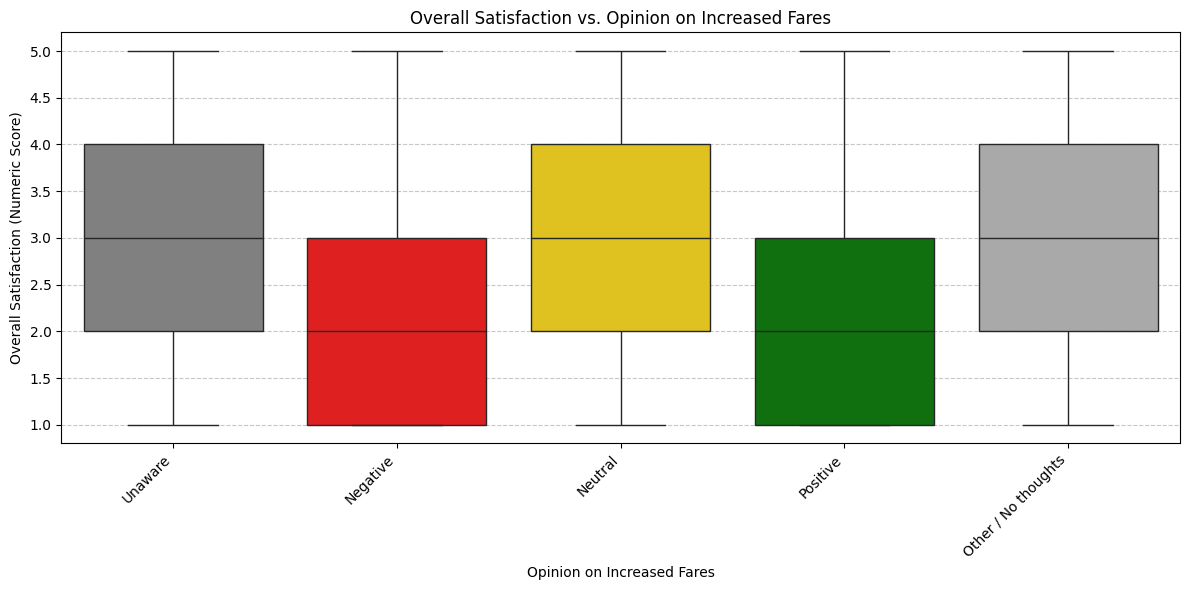

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fares_satisfaction_df = df.dropna(subset=['opinion_on_increased_fares', 'overall_satisfaction_num'])
fares_satisfaction_df = fares_satisfaction_df[fares_satisfaction_df['opinion_on_increased_fares'] != 'nan']

# Define custom palette and order
custom_palette = {
    'Unaware': 'grey',
    'Negative': 'red',
    'Neutral': 'gold',
    'Positive': 'green',
    'Other / No thoughts': 'darkgrey'
}

order = ['Unaware', 'Negative', 'Neutral', 'Positive', 'Other / No thoughts']

plt.figure(figsize=(12, 6))
sns.boxplot(x='opinion_on_increased_fares', y='overall_satisfaction_num', data=fares_satisfaction_df, palette=custom_palette, order=order, hue='opinion_on_increased_fares', legend=False)
plt.xlabel('Opinion on Increased Fares')
plt.ylabel('Overall Satisfaction (Numeric Score)')
plt.title('Overall Satisfaction vs. Opinion on Increased Fares')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We can see that the results are quite unexpected: people come to polar opposite opinions about fare increase while being equally unsatisfied with the subway service. However, Neutral respondents tend to have a higher satisfaction with the NYC subway.

The median satisfaction for both negative and positive opinion about increased fares is 2. This might point more to a demand for a change, because people are unsatisfied and wish to change enything for service improvements.


---



But how do passengers feel about the fares currently? Can they already afford them? Figuring this out below.


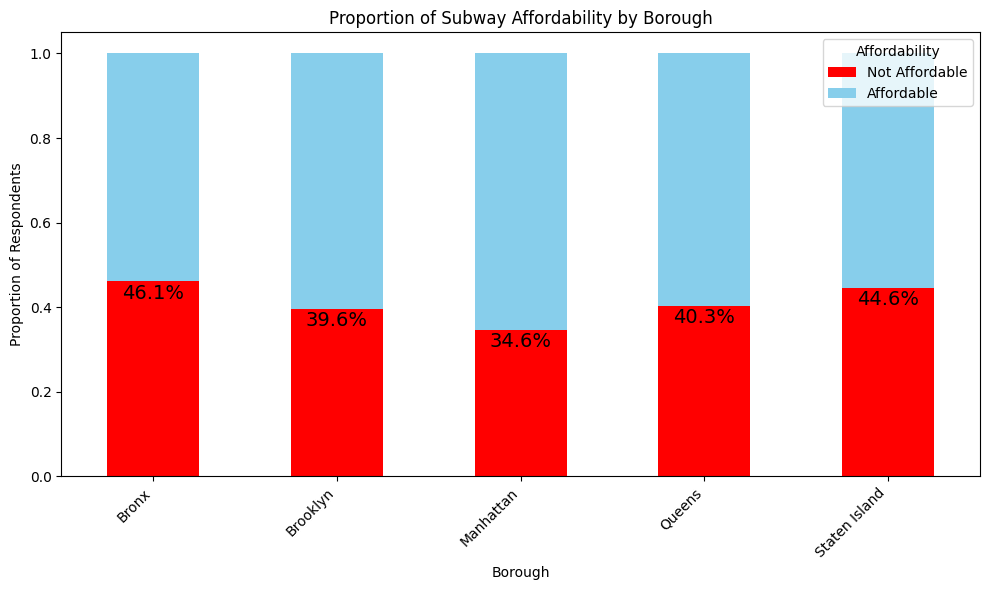

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

affordability_data = df[df['survey_stop_borough'] != 'nan']

total_respondents_per_borough = affordability_data['survey_stop_borough'].value_counts()

affordability_counts = affordability_data.groupby(['survey_stop_borough', 'is_subway_affordable']).size().unstack(fill_value=0)

if True not in affordability_counts.columns:
    affordability_counts[True] = 0
if False not in affordability_counts.columns:
    affordability_counts[False] = 0

affordability_proportions = affordability_counts.div(total_respondents_per_borough, axis=0).reset_index()
affordability_proportions = affordability_proportions.rename(columns={
    True: 'Affordable_Proportion',
    False: 'Not_Affordable_Proportion',
    'survey_stop_borough': 'Borough'
})

affordability_proportions_plot = affordability_proportions.rename(columns={
    'Affordable_Proportion': 'Affordable',
    'Not_Affordable_Proportion': 'Not Affordable'
}).set_index('Borough')

plt.figure(figsize=(10, 6))

ax = affordability_proportions_plot[['Not Affordable', 'Affordable']].plot(
    kind='bar',
    stacked=True,
    color=['red', 'skyblue'],
    ax=plt.gca()
)

# Add percentage labels on top of the 'Not Affordable' (red) bars
for i, (borough, row) in enumerate(affordability_proportions_plot.iterrows()):
    not_affordable_prop = row['Not Affordable']
    ax.text(i, not_affordable_prop - 0.05, f'{not_affordable_prop:.1%}', ha='center', va='bottom', color='black', fontsize=14)

plt.xlabel('Borough')
plt.ylabel('Proportion of Respondents')
plt.title('Proportion of Subway Affordability by Borough')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Affordability')
plt.tight_layout()
plt.show()


As expected, Passenges from Manhattan find Subway the most affortable among other boroughs, followed by Brooklyn, Queens, Staten Island, and Bronx.

Overall, a slight minority of people find the subway unaffordable, even though it's very close.


---



Even though zipcodes column wasn't as populated as others, we decided to give it a shot and still try to provide a meaningful data analysis.

Let's look at 5 most satisfied zipcodes in NYC

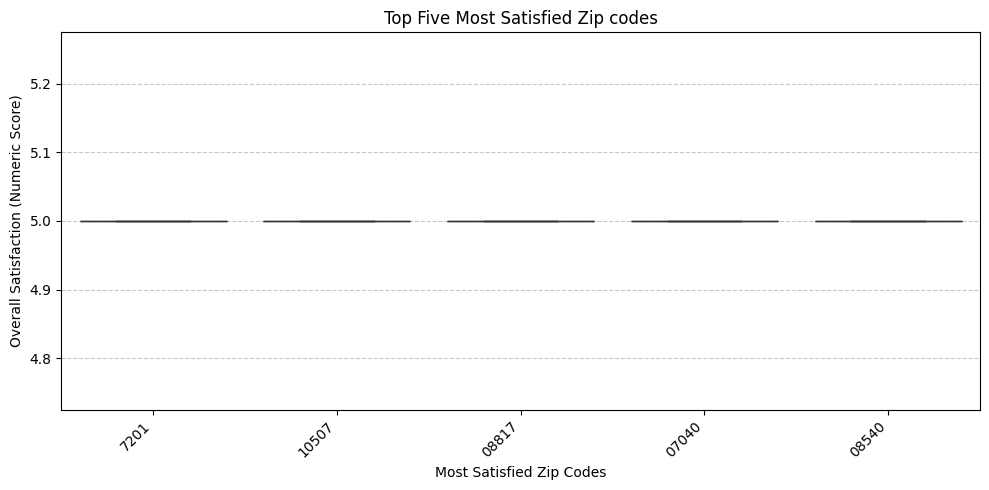

In [ ]:
Most_zip = (
    df.groupby('zip_code')['overall_satisfaction_num']
      .mean()
      .sort_values(ascending=False)
      .head(5)
)

# Filter the original DataFrame to include only the zip codes identified in Most_zip
zip_satisfaction_df = df[df['zip_code'].isin(Most_zip.index)].dropna(subset=['overall_satisfaction_num'])

plt.figure(figsize=(10, 5))
sns.boxplot(x='zip_code', y='overall_satisfaction_num', data=zip_satisfaction_df, palette='viridis', hue='zip_code', legend=False)
plt.xlabel('Most Satisfied Zip Codes')
plt.ylabel('Overall Satisfaction (Numeric Score)')
plt.title('Top Five Most Satisfied Zip codes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Suprisingly, the ZIP codes listed here with the highest satisfaction aren't based in New York City. We can assume that those who were satisfied with the New York Subway are people who are not regularly using it and come from New Jersey or Upstate New York for a visit.



---



However, let's now check where the least satisfied zip codes are located.

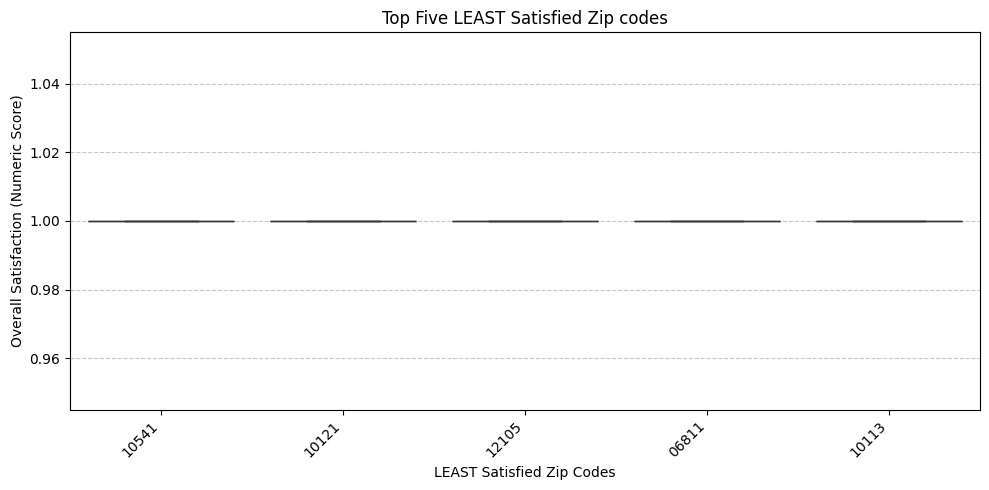

In [ ]:
Least_zip = (
    df.groupby('zip_code')['overall_satisfaction_num']
      .mean()
      .sort_values(ascending=True)
      .head(5)
)

# Filter the original DataFrame to include only the zip codes identified in Least_zip
zip_satisfaction_df = df[df['zip_code'].isin(Least_zip.index)].dropna(subset=['overall_satisfaction_num'])

plt.figure(figsize=(10, 5))
sns.boxplot(x='zip_code', y='overall_satisfaction_num', data=zip_satisfaction_df, palette='viridis', hue='zip_code', legend=False)
plt.xlabel('LEAST Satisfied Zip Codes')
plt.ylabel('Overall Satisfaction (Numeric Score)')
plt.title('Top Five LEAST Satisfied Zip codes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Three out of five Zip Codes are located in NYC this time, 2 of them in Manhattan. We can see that New York residents tend to be less satisfied with the Subway system than outsiders.



---



Top Five MID Zip[link text](https://)

Let's now check the zipcodes that are neither satisfied or dissatisfied:

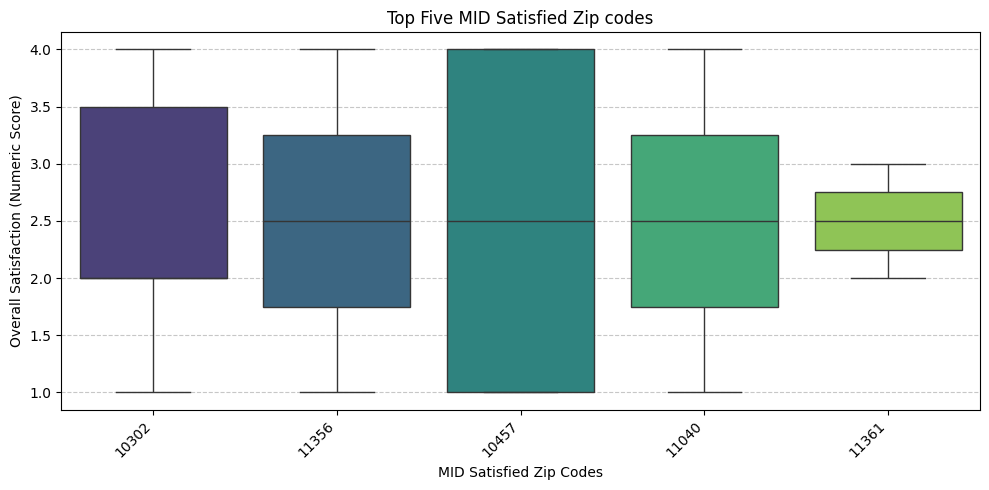

In [ ]:
Mid_zip_series = (
    df.groupby('zip_code')['overall_satisfaction_num']
      .mean()
      .sort_values(ascending=True)
)


num_zips = len(Mid_zip_series)
if num_zips >= 5:
    mid_index_start = max(0, (num_zips // 2) - 2)
    Mid_zip = Mid_zip_series.iloc[mid_index_start : mid_index_start + 5]
else:
    Mid_zip = Mid_zip_series


zip_satisfaction_df = df[df['zip_code'].isin(Mid_zip.index)].dropna(subset=['overall_satisfaction_num'])

plt.figure(figsize=(10, 5))
sns.boxplot(x='zip_code', y='overall_satisfaction_num', data=zip_satisfaction_df, palette='viridis', hue='zip_code', legend=False)
plt.xlabel('MID Satisfied Zip Codes')
plt.ylabel('Overall Satisfaction (Numeric Score)')
plt.title('Top Five MID Satisfied Zip codes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

All the zipcodes with the average satisfaction are located in New York City, with the Bronx zip code 10457 having a huge range of satisfaction from 1 to 4.


---



### Conclusion

While the data doesn't let us figure overall trends in attitudes towards New York Subway over time due to the specifics of data collection, there are still many important insights that we got out of our analysis.

Shorter lines tend to have higher satisfaction.

Delays are a major issue reported by the survey respondents, and there is a negative correlation between Delay time and Overall satisfaction: the higher the delay time, the lower the satisfaction.

Among those who are unsatisfied, the opinion on increased fares was polarized: unsatisfied passengers are looking for a service improvement, so they are taking a stronger stance on occuring changes.

However, the fare increase could harm the financial state of respondents: almost a half of surveyed passengers find New York Subway unaffordable.

Also, among the respondents who stated their zipcode, those who are out of NYC tend to be more satisfied than those who are in NYC.



